# integrate Pellin et.al data using bbknn
https://github.com/Teichlab/bbknn/blob/master/examples/pancreas.ipynb
They've shown bbknn can integrate multiple datasets from different technology. It shouldn't be a problem with data from the same technology

In [1]:
# load annotation and packages needed
from scSecretome.sc import *
from scSecretome.annot import *
import scanpy as sc

# all the data
from os import listdir
file_list = listdir('/home/hsher/nature2019_sc/raw_counts/')
# the paper contain data from two patients
sample_two = [s for s in file_list if 'Lin' in s]
sample_one = [s for s in file_list if 'Lin' not in s]

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.3 scipy==1.3.1 pandas==0.25.2 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [2]:

def filter_pellin(sample):
    '''
    input list of samples for experiment
    output combined data matrix
    '''
    d = read_raw_counts('/home/hsher/nature2019_sc/raw_counts/'+sample)
    
    # put FACs data inside
    d.obs['cluster'] = thres_df.loc[sample, 'annotation']
        
    # filter by transcript per cell
    sc.pp.filter_cells(d, min_counts = thres_df.loc[sample, 'transcript per cell'])
        
    # called benchmarking to calculate 
    benchmarking(d)
        
    # fileter by mitochondrial trancript: dying cell
    d = d[d.obs['percent_mito']<0.25]
    
    return(d)

def concat_data(sample_list):
    '''
    concat data
    '''
    processed = list(map(filter_pellin, sample_list))
    concat = processed[0].concatenate(processed[1:len(processed)], batch_key='facs')
    
    return(concat)

In [3]:
# concatenate all cells groups
concat_one = concat_data(sample_one)
concat_two = concat_data(sample_two)
concat = concat_one.concatenate(concat_two, batch_key = 'batch')
concat.obs_names_make_unique

# normalize but exclude hightly expressed gene
sc.pp.normalize_total(concat, exclude_highly_expressed=True, max_fraction=0.05, inplace=True)

# save raw data, normalized and log
concat.raw = sc.pp.log1p(concat, copy=True)

... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305364_CMP.raw_counts.h5ad
Library
... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305363_MEP.raw_counts.h5ad
Library
... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305365_GMP.raw_counts.h5ad
Library
... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305362_PreBNK.raw_counts.h5ad
Library
... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305360_MPP.raw_counts.h5ad
Library
... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305359_HSC.raw_counts.h5ad
Library
... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305361_MLP.raw_counts.h5ad
Library
... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305369_LinNegCD34NegCD164low.raw_counts.h5ad
Library
filtered out 15 cells that haveless than 800 counts
... reading from cache file cache/home-hsher-nature2019

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Library


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305366_LinNegCD34PosCD164Pos.raw_counts.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Library


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305368_LinNegCD34lowCD164high.raw_counts.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Library


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Normalizing counts per cell. The following highly-expressed genes are not considered during normalization factor computation:
['CA1', 'CLC', 'CTSG', 'DEFA3', 'DEFA4', 'EEF1A1', 'ELANE', 'HBA1', 'HBA2', 'HBB', 'HBD', 'IGHM', 'IGKC', 'LYZ', 'SLC25A37', 'SRGN']
    finished (0:00:14):normalized adata.X


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


extracting highly variable genes
    finished (0:00:20)


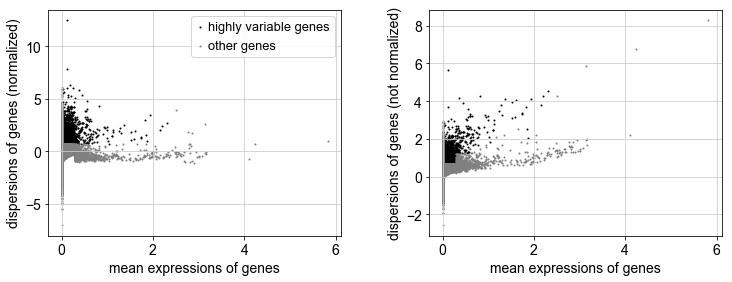

[2042, 20582]


In [4]:
# find highly variable genes
filter_result = sc.pp.filter_genes_dispersion(
    concat.X, min_mean=0.0125, max_mean=2.5, min_disp=0.7)
sc.pl.filter_genes_dispersion(filter_result)
print([sum([i[0] for i in filter_result]),len(filter_result)])

/home/hsher/miniconda3/envs/scanpy/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:285: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(data)
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 50
    finished (0:00:07)


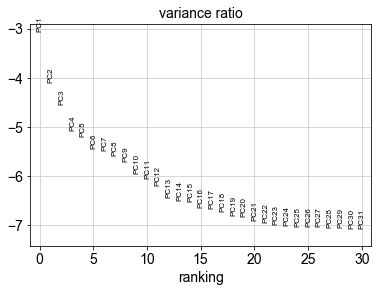

In [5]:
# filter and retain only the filtered result
adata = concat[:, filter_result.gene_subset]
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata)
adata.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat
sc.pl.pca_variance_ratio(adata, log=True)



computing neighbors
    using 'X_pca' with n_pcs = 20


/home/hsher/miniconda3/envs/scanpy/lib/python3.6/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../miniconda3/envs/scanpy/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/hsher/miniconda3/envs/scanpy/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../miniconda3/envs/scanpy/lib/p

    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:16)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:57)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 17 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:03)


... storing 'cluster' as categorical
... storing 'facs' as categorical


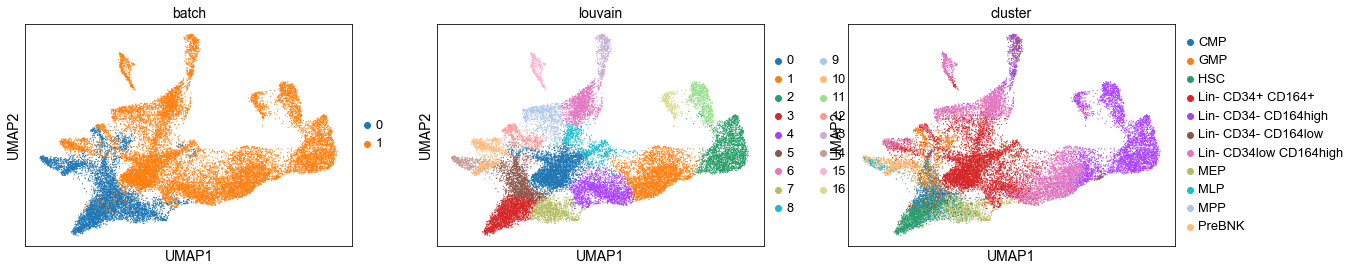

In [6]:
num_pcs = 20 # dtermined by elbow method

# bbknn rely on neighbors
sc.pp.neighbors(adata,n_pcs=num_pcs, n_neighbors=20)
sc.tl.umap(adata)
sc.tl.louvain(adata)

# see uncorrected data
sc.pl.umap(adata, color=['batch','louvain','cluster'])

#clear out the cluster plot colour map by hand, as otherwise it stays
del adata.uns['louvain_colors']

computing batch balanced neighbors


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


	finished: added to `.uns['neighbors']`
	'distances', weighted adjacency matrix
	'connectivities', weighted adjacency matrix (0:00:09)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:33)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 14 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:03)
running Leiden clustering
    finished: found 21 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:10)


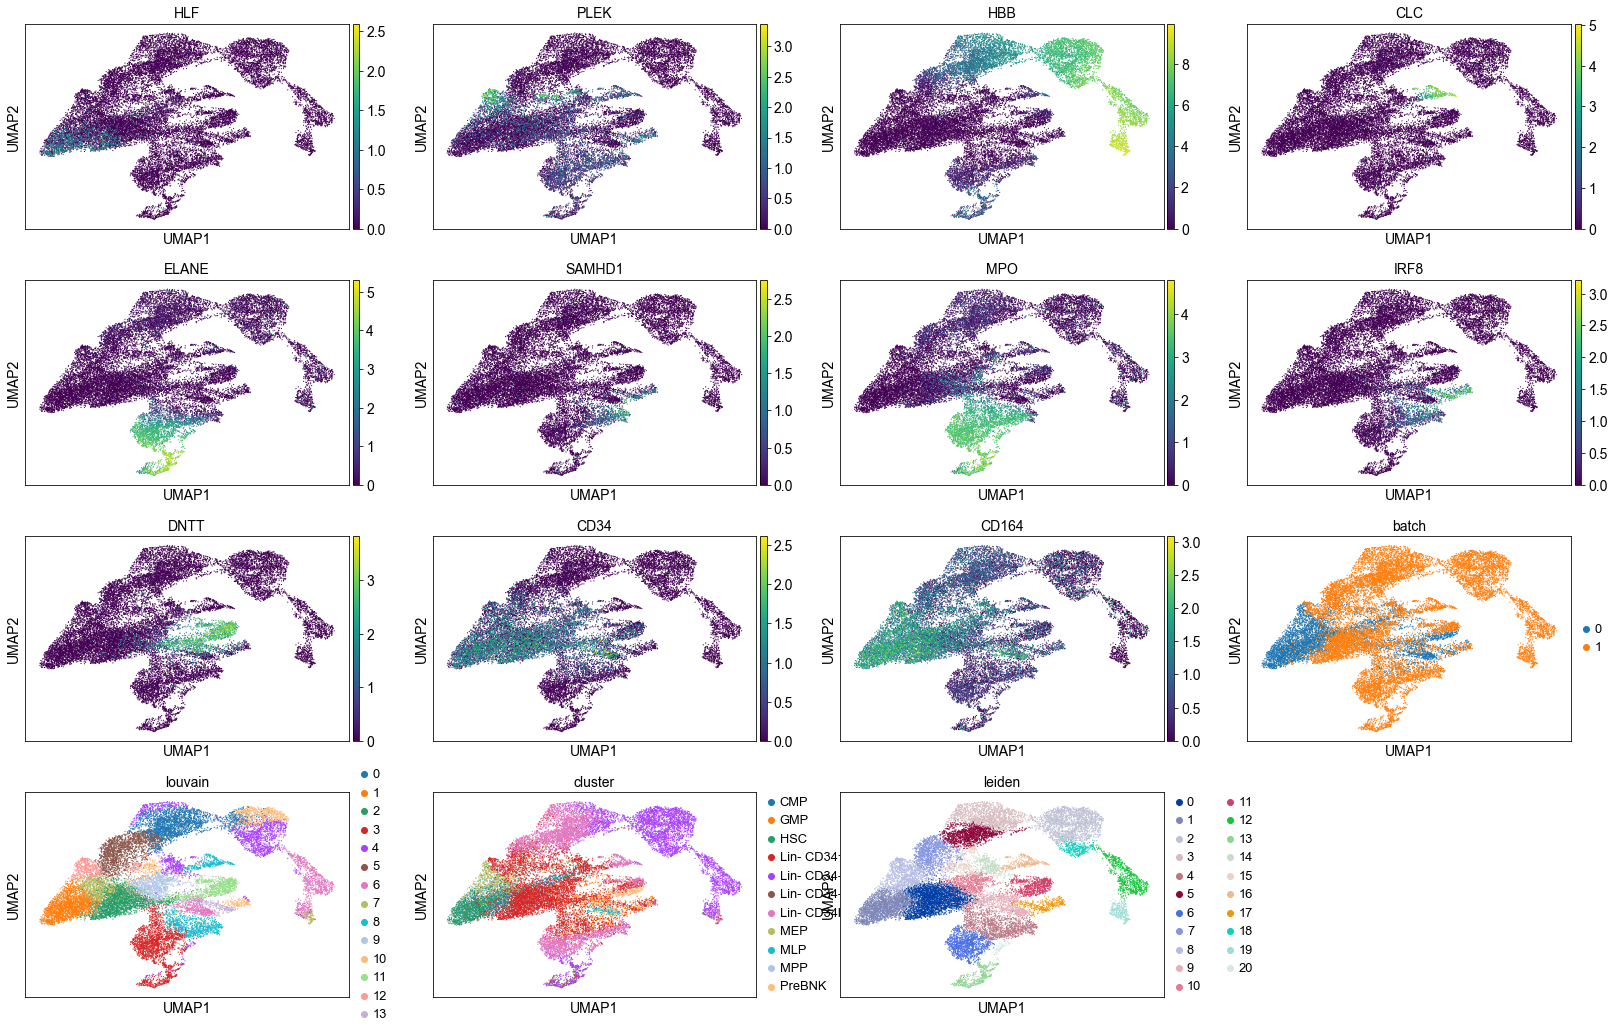

In [7]:
# compar to batch effect correction
import bbknn
adata_bbknn = bbknn.bbknn(adata, neighbors_within_batch=5, n_pcs=num_pcs, trim=0, copy=True)
sc.tl.umap(adata_bbknn)

# two clustering method
sc.tl.louvain(adata_bbknn)
sc.tl.leiden(adata_bbknn)

# use raw so that all genes are included
sc.pl.umap(adata_bbknn, color = pellin_lineage()['Gene Symbol'].tolist() + ['batch','louvain','cluster', 'leiden'], use_raw = True)



In [8]:
concat.X.shape

(21397, 20582)

In [9]:
adata.X.shape # after select highly variable genes

(21397, 2042)

In [10]:
adata_bbknn.X.shape # BBKNN adjusted

(21397, 2042)

# unnecessary step
concat.obs = adata_bbknn.obs
concat.obsm = adata_bbknn.obsm
concat.uns = adata_bbknn.uns

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:02)
--> added 'pos', the PAGA positions (adata.uns['paga'])


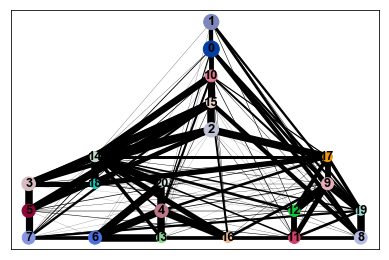

In [11]:
# pseudotime analysis
sc.tl.paga(adata_bbknn, groups = 'leiden')
sc.pl.paga(adata_bbknn, layout='rt', root = [1]) 

In [ ]:
sc.tl.diffmap(adata_bbknn)
# assign root node
adata_bbknn.uns['iroot'] = np.flatnonzero(adata_bbknn.obs['leiden'] == '1')[1]
sc.tl.dpt(adata_bbknn)

sc.tl.draw_graph(adata_bbknn)


In [ ]:
# trajectory inference: leiden has finer structure!!
sc.pl.draw_graph(adata_bbknn, color=pellin_lineage()['Gene Symbol'].tolist()+['louvain', 'cluster', 'batch', 'leiden', 'dpt_pseudotime'], use_raw=True)

In [ ]:
# pseudotime analysis of transcription factor change

# need to assign time https://nbviewer.jupyter.org/github/theislab/paga/blob/master/blood/simulated/simulated.ipynb

# human assigned
paths = [('CMP-Gran-N(ELANE/MPO)', [1,0,4,6,13]),
         ('M(SMAD)', [1,0,17]),
         ('CMP-Ly(DNTT)', [1,0,9,19,8]),
         ('Meg-Erythro', [1,7,5,3,2,18,12])
         
        ]

#
gene_names = ['GATA2', 'LYL1', 'AML', 'TAL1', 'FLI1', 'ERG', 'RUNX1', 'LMO2', 'SCL', 'GATA1', 'ENO1', 
              'PBX1', 'KLF', 'IRF8', 'SATB1', 'RUNX2', 'JUNB', 'GFI1', 'SPI1', 'CEBPA']

# make sure they are present
gene_names = list(set(gene_names).intersection(adata_bbknn.var_names))

# plotting
import matplotlib.pyplot as plt
_, axs = plt.subplots(ncols=len(paths), figsize=(12, 5), gridspec_kw={'wspace': 0.05, 'left': 0.12})
plt.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(paths):
    _, data = sc.pl.paga_path(
        adata_bbknn, path, gene_names,
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['dpt_pseudotime'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='coolwarm',
        color_maps_annotations={'distance': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)
    

plt.show()

In [ ]:
adata_bbknn.write('/home/hsher/processed_single_cell_data/pellin_bbknn.h5ad')